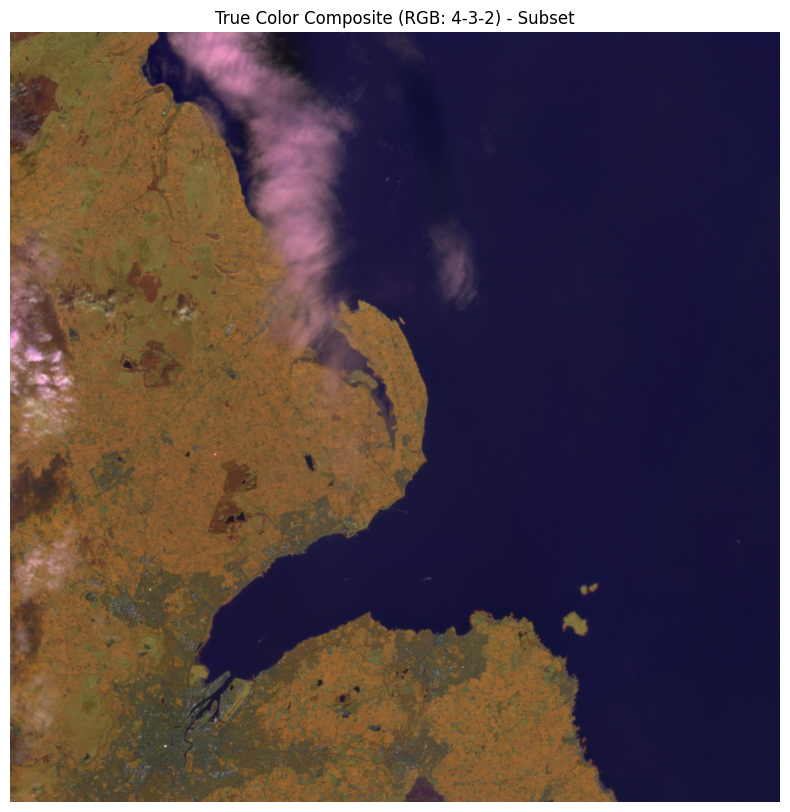

In [ ]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to your stacked Sentinel-2 GeoTIFF file
stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2'


try:
    # Open the stacked Sentinel-2 image
    with rasterio.open(stacked_image_path) as src:
        # Get image dimensions
        width = src.width
        height = src.height

        # Define a window (e.g., use the entire image or a subset)
        window_width = min(width, 5000)  # Adjust as needed
        window_height = min(height, 5000) # Adjust as needed
        window = rasterio.windows.Window(0, 0, window_width, window_height)

        # Read only this window from RGB bands
        B2 = src.read(2, window=window)  # Blue - Band 2
        B3 = src.read(3, window=window)  # Green - Band 3
        B4 = src.read(4, window=window)  # Red - Band 4

    # Normalize for display
    def normalize(band):
        band_min, band_max = np.min(band), np.max(band)
        return np.clip((band - band_min) / (band_max - band_min), 0, 1)

    # Stack the RGB bands
    rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Gamma correction
    gamma = 2.2
    rgb_image = np.power(rgb_image, 1/gamma)

    # Plot the True Color Composite
    plt.figure(figsize=(10, 10))  # Increased figure size
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2) - Subset")
    plt.axis("off")
    plt.show()

except rasterio.RasterioIOError as e:
    print(f"Error opening the image file: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [ ]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Path to folder containing your stacked images
stacked_dir = 'C:\\Users\\wasif\\Desktop\\stacked_images'

# List all JP2 files
image_files = [f for f in os.listdir(stacked_dir) if f.endswith('.jp2')]

# Utility function for band normalization
def normalize(band):
    band_min, band_max = np.min(band), np.max(band)
    if band_max - band_min == 0:
        return np.zeros_like(band)
    return np.clip((band - band_min) / (band_max - band_min), 0, 1)

# Grid layout
cols = 3  # Number of columns in grid
rows = int(np.ceil(len(image_files) / cols))

# Create plot
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for idx, filename in enumerate(image_files):
    filepath = os.path.join(stacked_dir, filename)
    try:
        with rasterio.open(filepath) as src:
            width, height = src.width, src.height
            window_width = min(width, 5000)
            window_height = min(height, 5000)
            window = rasterio.windows.Window(0, 0, window_width, window_height)

            B2 = src.read(2, window=window)
            B3 = src.read(3, window=window)
            B4 = src.read(4, window=window)

            rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)
            gamma = 2.2
            rgb_image = np.power(rgb_image, 1 / gamma)

        axes[idx].imshow(rgb_image)
        axes[idx].set_title(f"{filename}", fontsize=10)
        axes[idx].axis("off")

    except Exception as e:
        print(f"Failed to load {filename}: {e}")
        axes[idx].set_visible(False)

# Hide any unused axes
for i in range(len(image_files), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


In [6]:
import rasterio

stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2'  # Replace with your file path

try:
    with rasterio.open(stacked_image_path) as src:
        print(f"Number of bands: {src.count}")
        print(f"Band Data Types: {src.dtypes}")
        print(f"Metadata Example: {src.tags(1)}")
except rasterio.RasterioIOError as e:
    print(f"Error opening image: {e}")

Number of bands: 12
Band Data Types: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
Metadata Example: {}


In [7]:
import rasterio

stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2' # Replace with your file path

try:
    with rasterio.open(stacked_image_path) as src:
        print(f"Number of bands: {src.count}")
        print(f"Band Data Types: {src.dtypes}")

        for i in range(1, src.count + 1):  # Iterate through each band
            band_data = src.read(i) #Read data
            print(f"--- Band {i} ---")
            print(f"  Min: {np.min(band_data)}, Max: {np.max(band_data)}, Mean: {np.mean(band_data)}")
            print(f"  Metadata: {src.tags(i)}")  # Print band-specific metadata
            
except rasterio.RasterioIOError as e:
    print(f"Error opening image: {e}")

Number of bands: 12
Band Data Types: ('uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16', 'uint16')
--- Band 1 ---
  Min: 0, Max: 18130, Mean: 1546.7032768554186
  Metadata: {}
--- Band 2 ---
  Min: 764, Max: 19872, Mean: 1349.4444579065762
  Metadata: {}
--- Band 3 ---
  Min: 1014, Max: 16188, Mean: 1687.859824768332
  Metadata: {}
--- Band 4 ---
  Min: 844, Max: 16648, Mean: 2132.4668172302017
  Metadata: {}
--- Band 5 ---
  Min: 0, Max: 19234, Mean: 1442.9184944807748
  Metadata: {}
--- Band 6 ---
  Min: 0, Max: 16837, Mean: 2119.7047897402463
  Metadata: {}
--- Band 7 ---
  Min: 983, Max: 16096, Mean: 1411.0503424922279
  Metadata: {}
--- Band 8 ---
  Min: 788, Max: 16959, Mean: 2011.0917723647235
  Metadata: {}
--- Band 9 ---
  Min: 860, Max: 16793, Mean: 2128.9343784111534
  Metadata: {}
--- Band 10 ---
  Min: 0, Max: 17413, Mean: 1361.1484991008656
  Metadata: {}
--- Band 11 ---
  Min: 846, Max: 17059, Mean: 1915.18440555

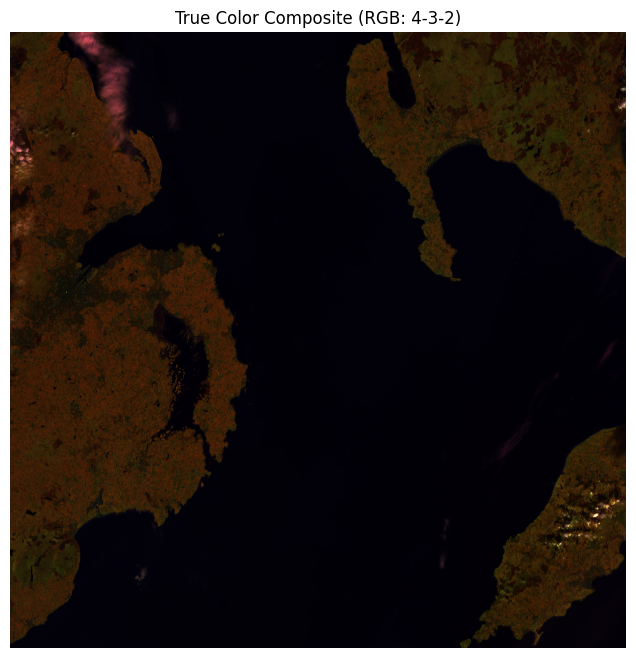

In [15]:
import matplotlib.pyplot as plt

with rasterio.open(stacked_image_path) as src:
    # Read an RGB combination (B4-B3-B2)
    B4, B3, B2 = src.read(4), src.read(3), src.read(2)

    # Normalize function for visualization
    def normalize(band):
        return (band - band.min()) / (band.max() - band.min() + 1e-6)

    rgb_image = np.stack([normalize(B4), normalize(B3), normalize(B2)], axis=-1)

    # Display the image
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2)")
    plt.axis("off")
    plt.show()


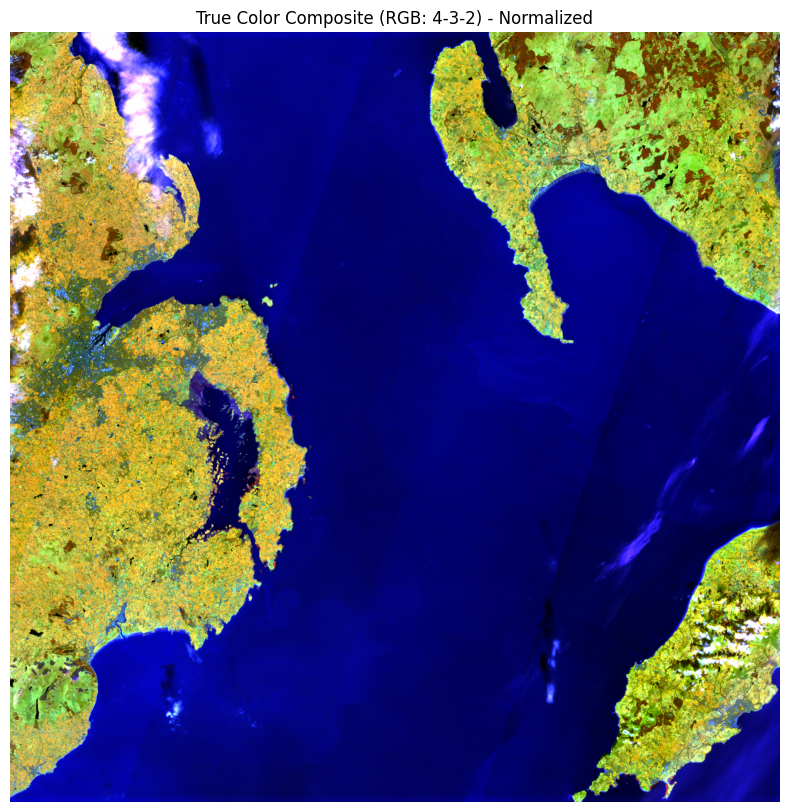

In [ ]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt

stacked_image_path = 'c:\\Users\\wasif\\Desktop\\stacked_images\\Image_35_stacked.jp2'

with rasterio.open(stacked_image_path$) as src:
    # Read RGB bands (4-3-2)
    B4, B3, B2 = src.read(4), src.read(3), src.read(2)

    # Function to normalize using percentile stretch
    def normalize_band(band):
        min_val, max_val = np.percentile(band, (2, 98))  # Stretch between 2nd and 98th percentiles
        band = np.clip(band, min_val, max_val)
        return (band - min_val) / (max_val - min_val + 1e-6)

    # Apply normalization
    rgb_image = np.stack([normalize_band(B4), normalize_band(B3), normalize_band(B2)], axis=-1)

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(rgb_image)
    plt.title("True Color Composite (RGB: 4-3-2) - Normalized")
    plt.axis("off")
    plt.show()


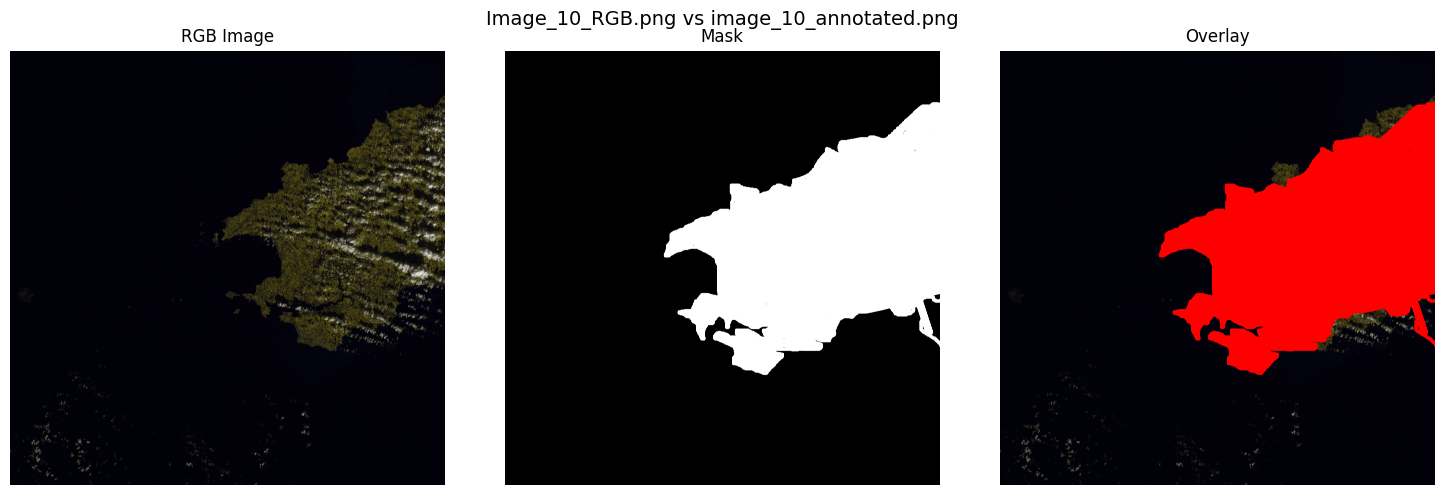

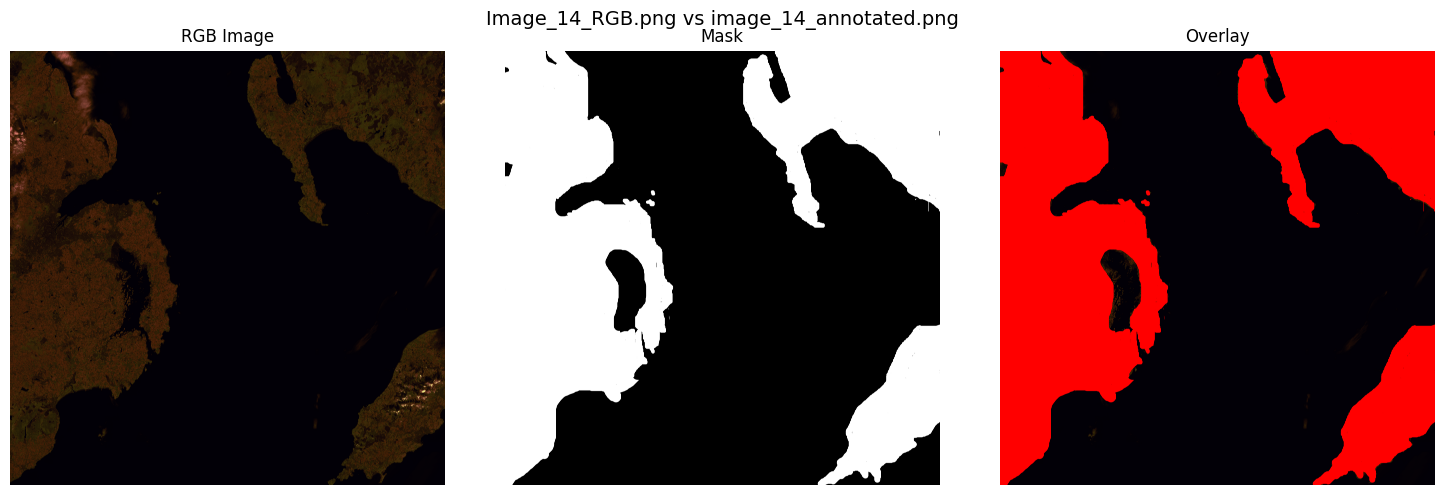

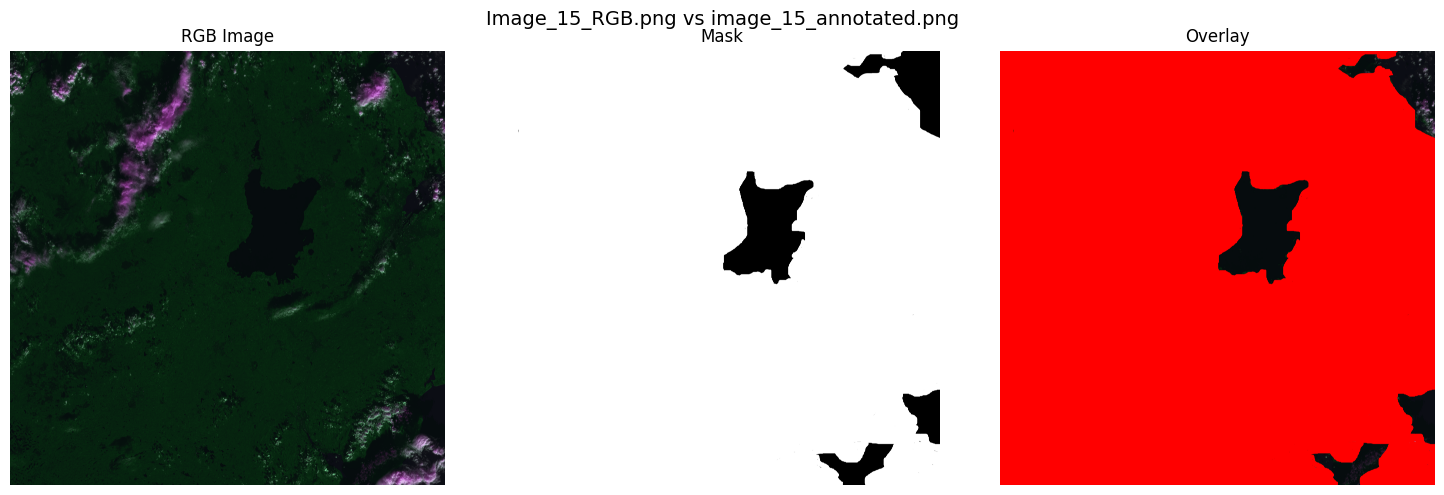

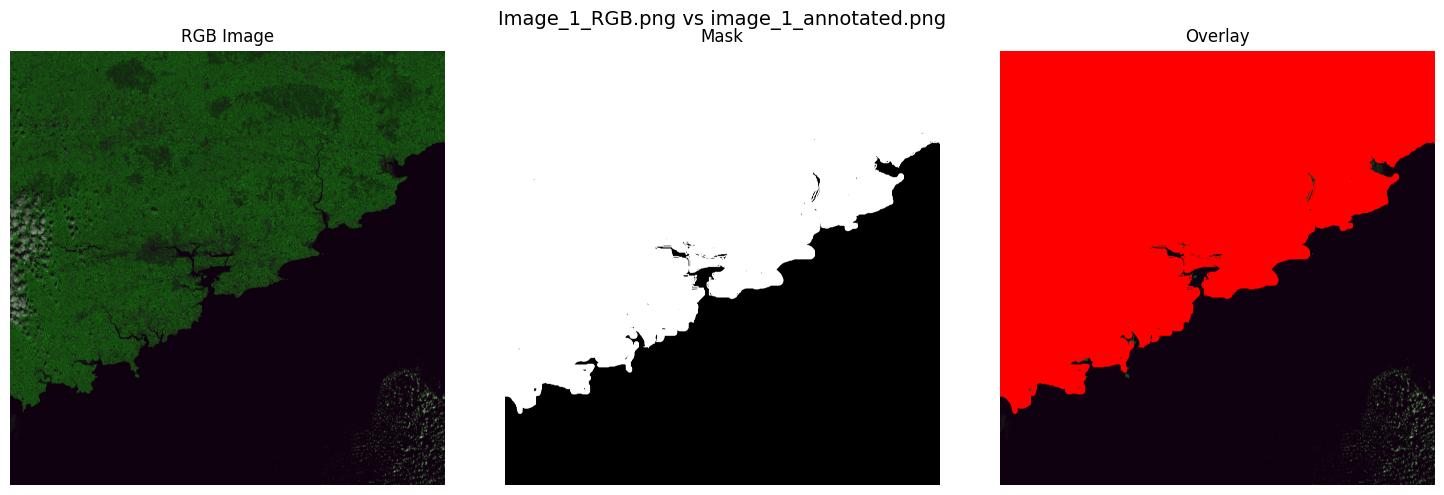

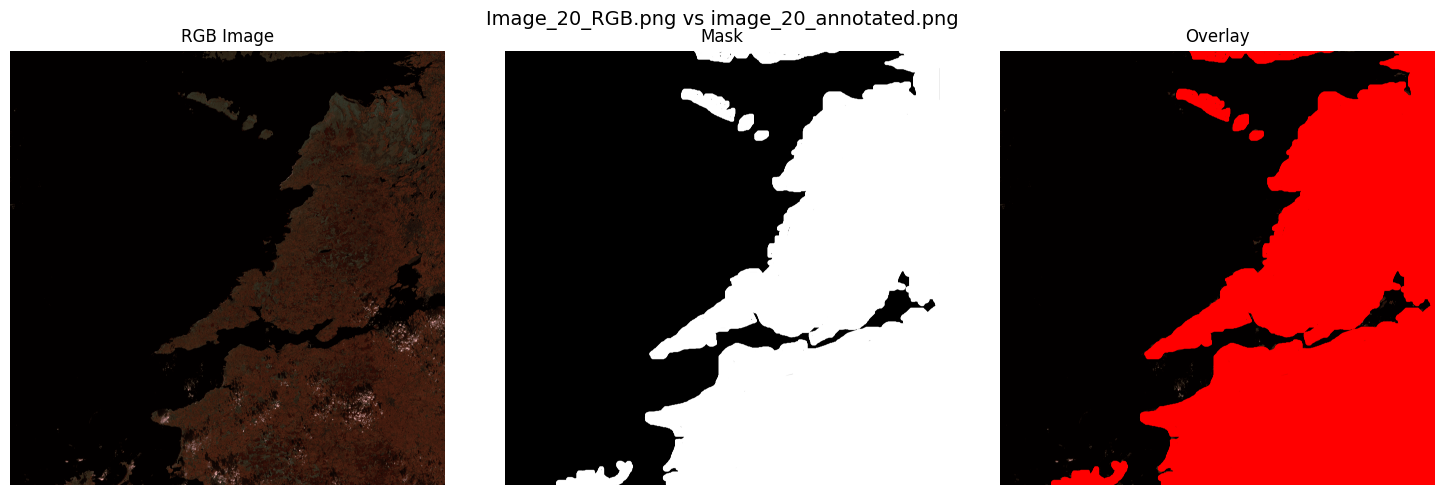

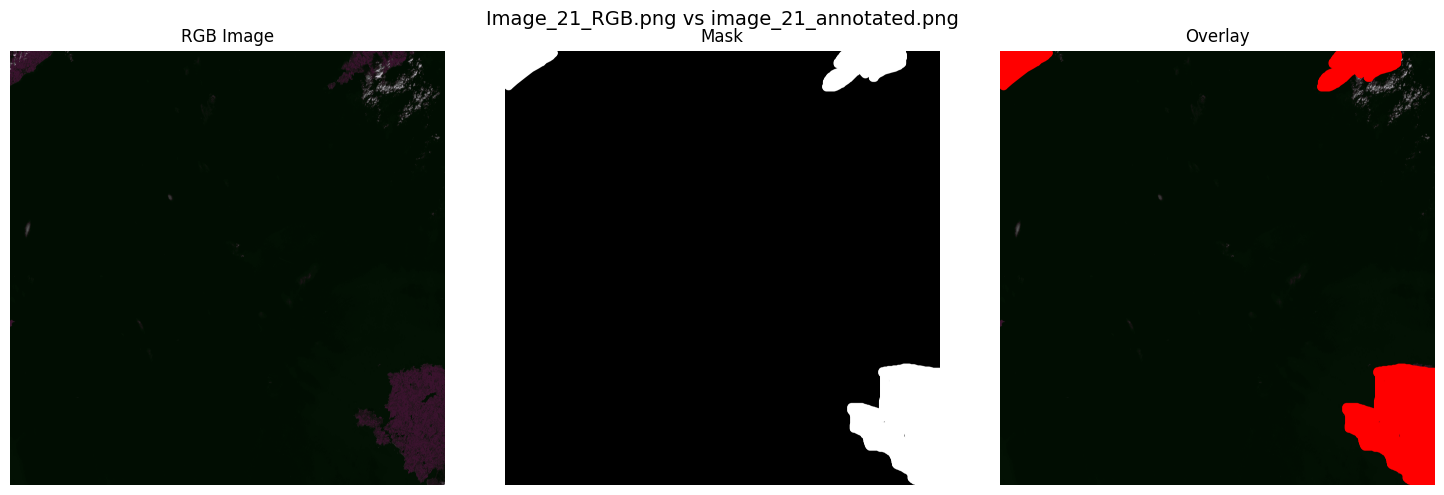

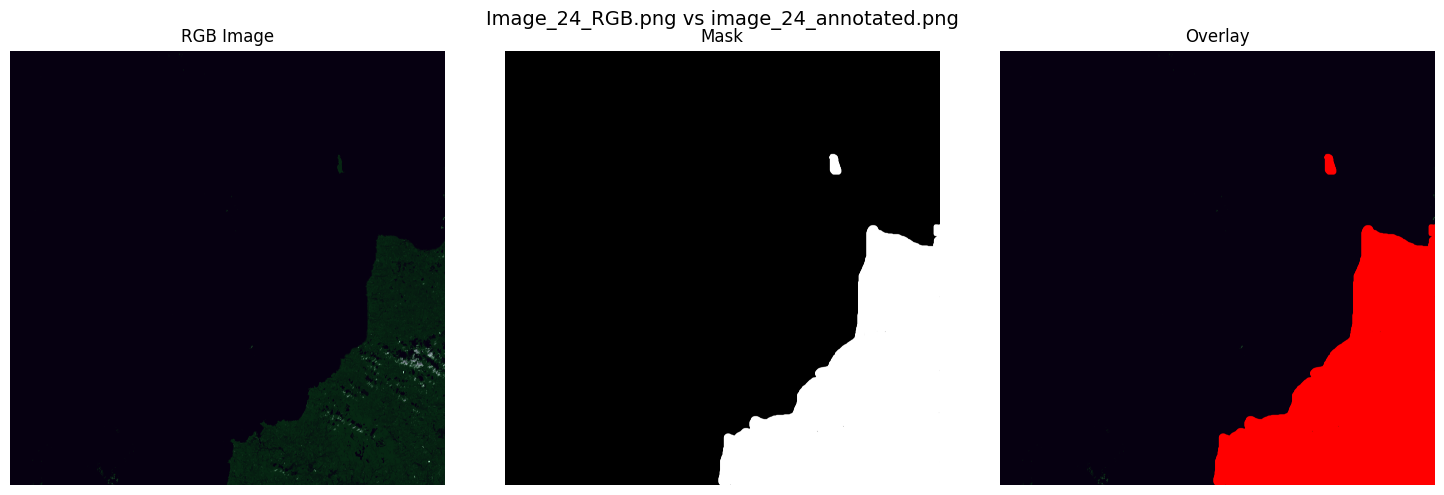

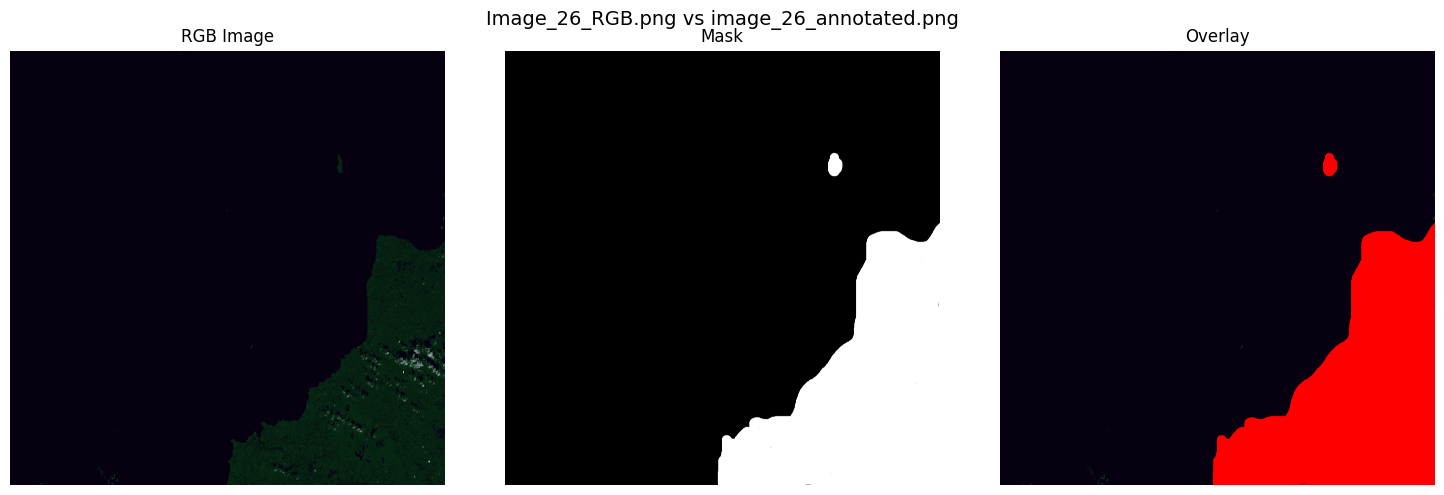

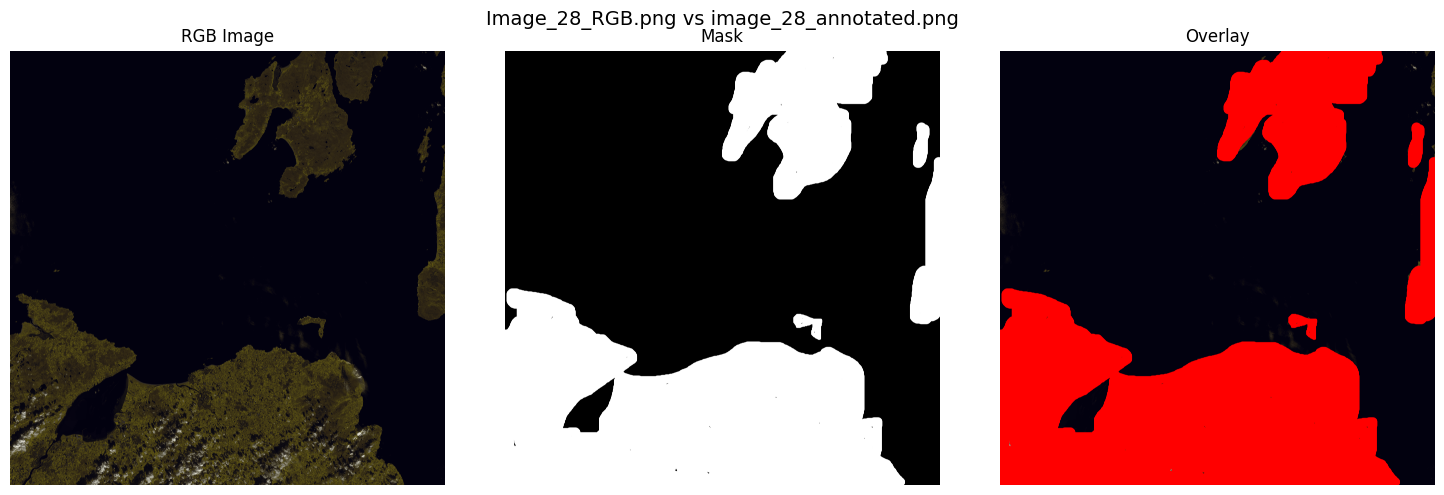

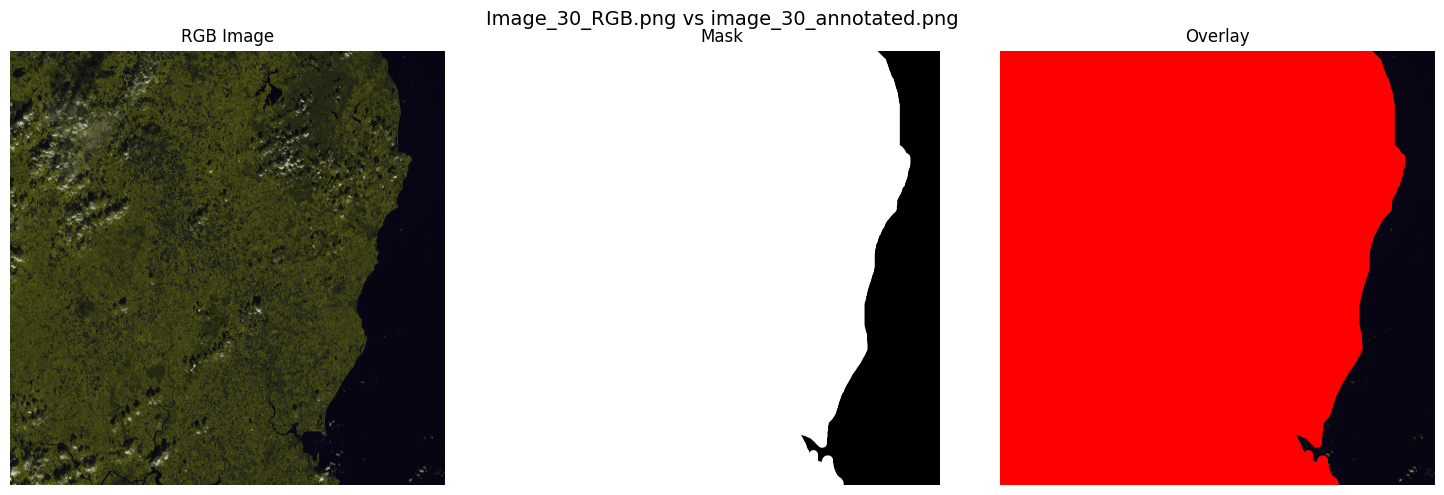

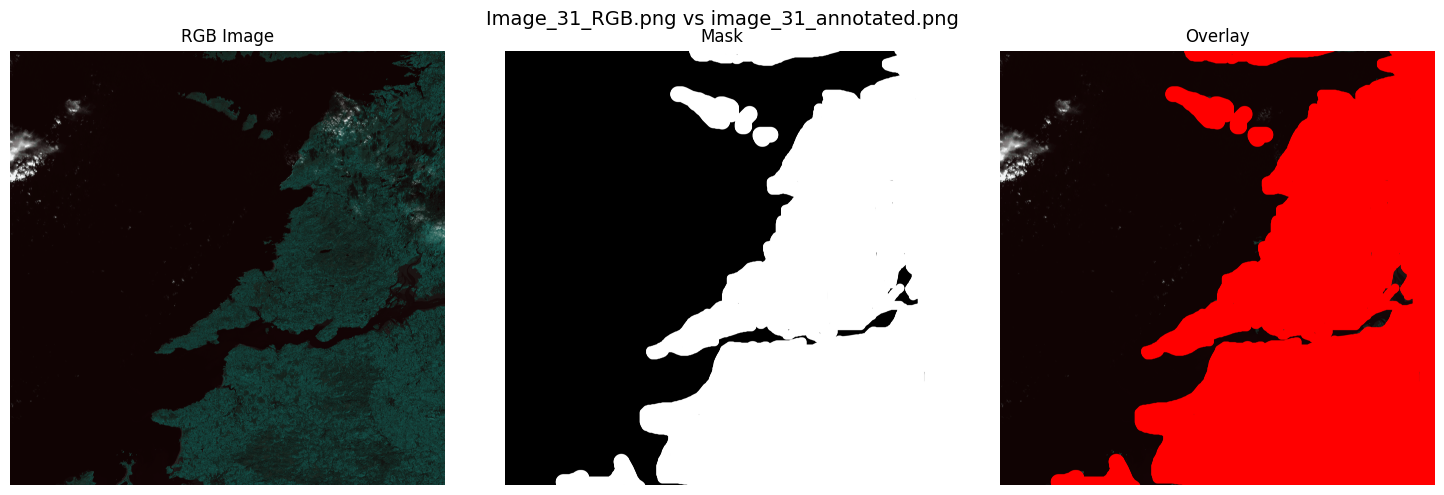

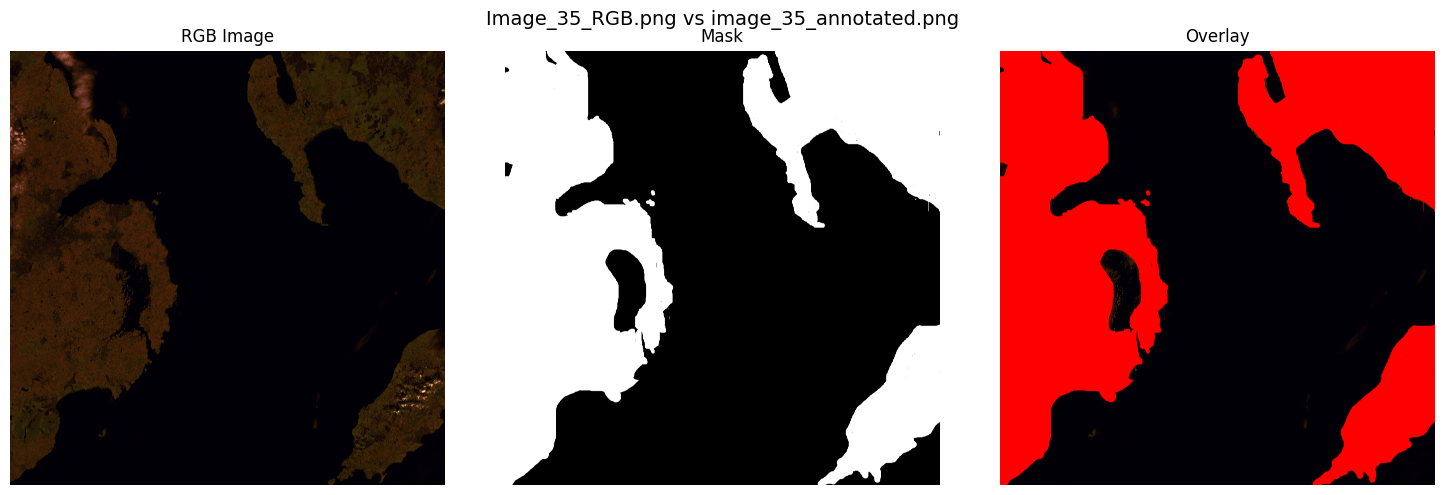

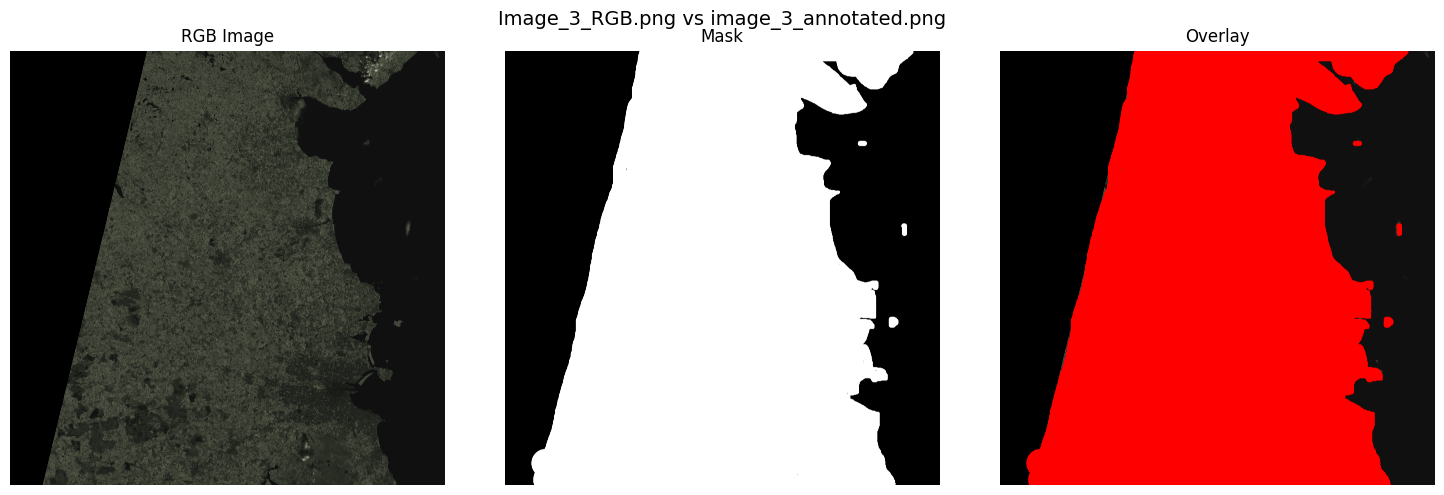

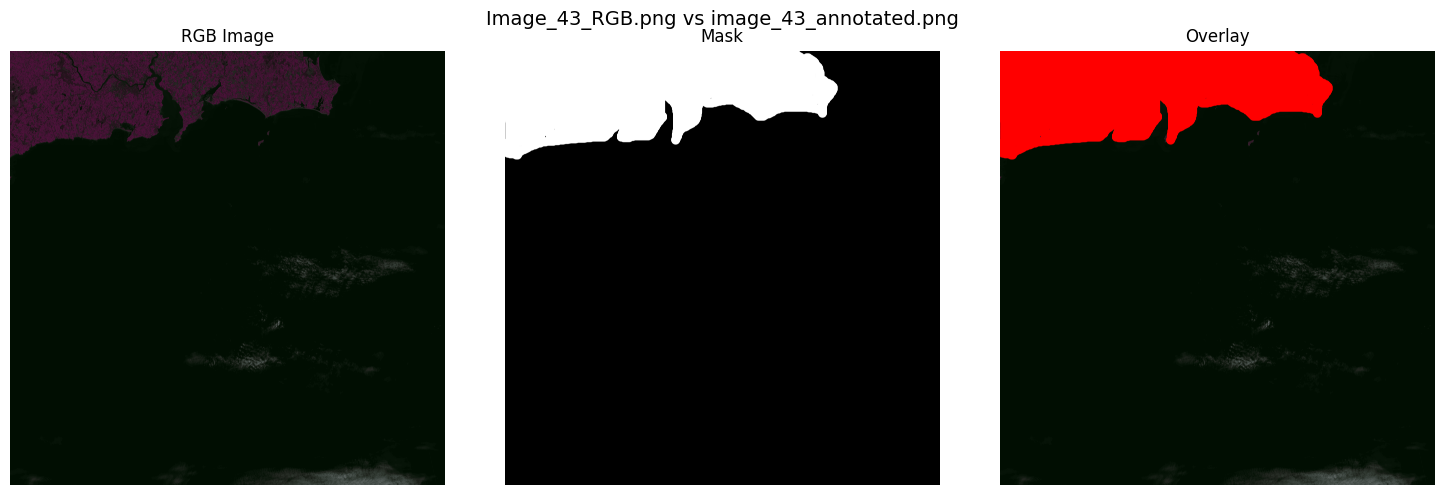

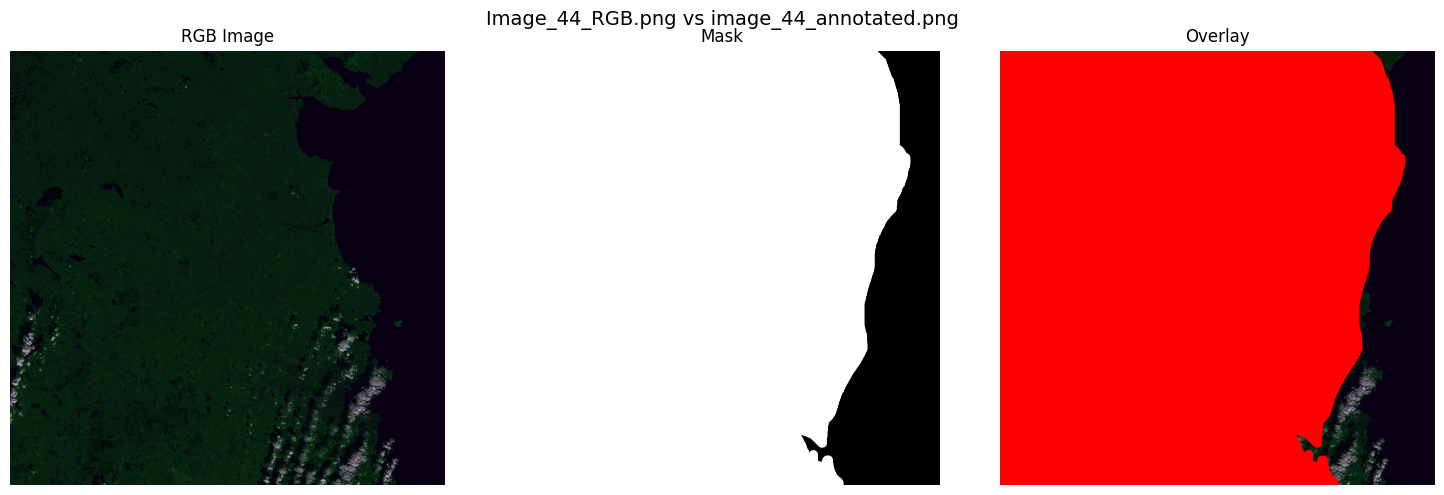

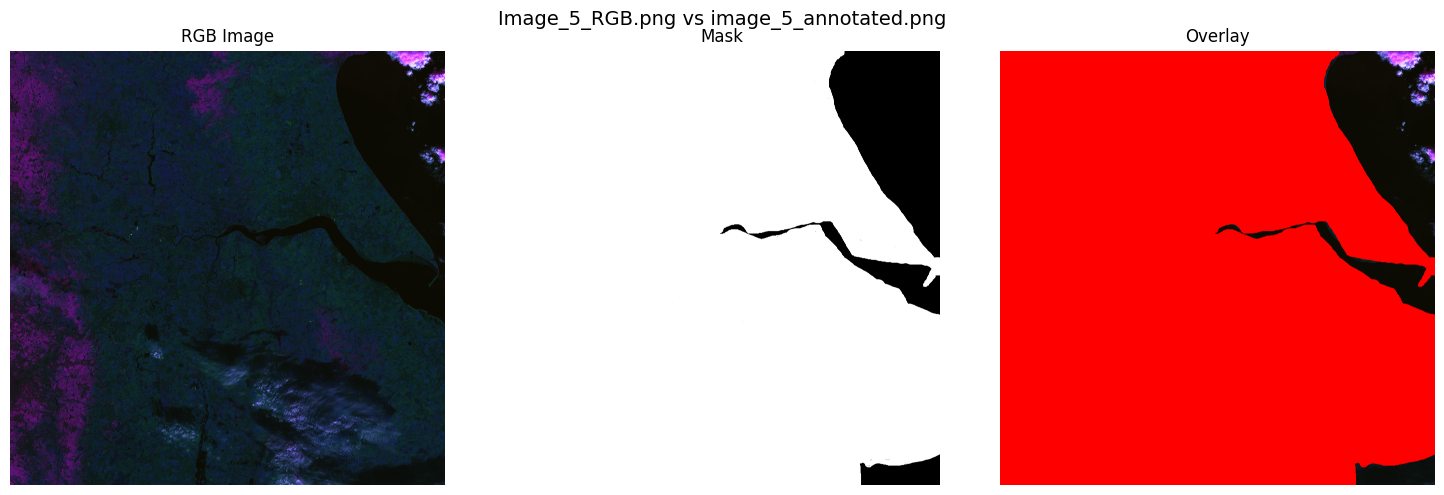

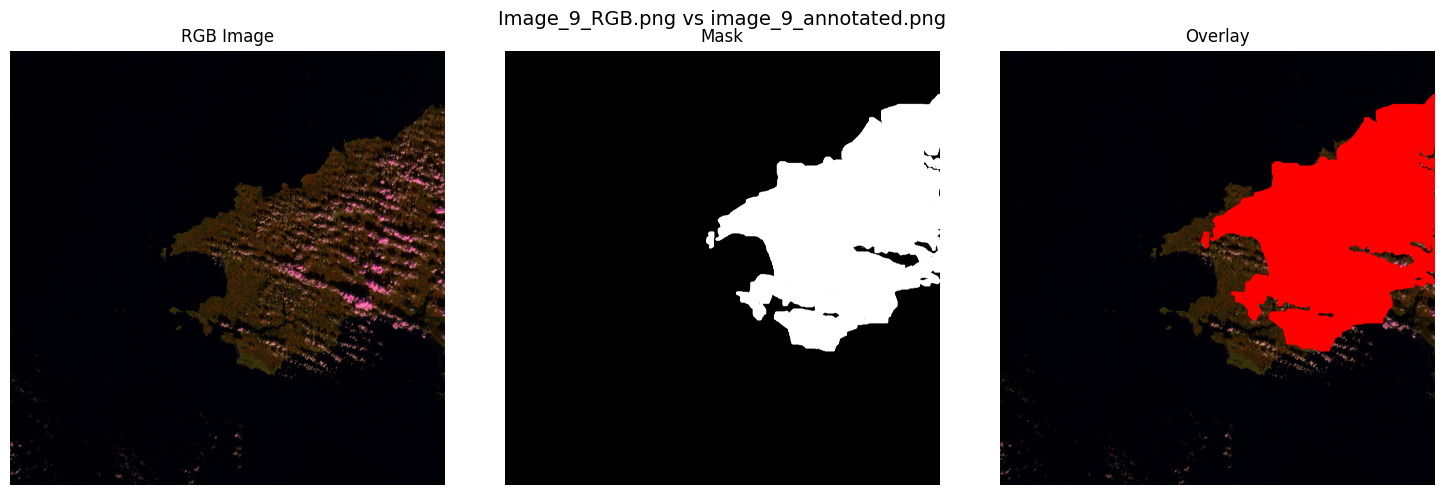

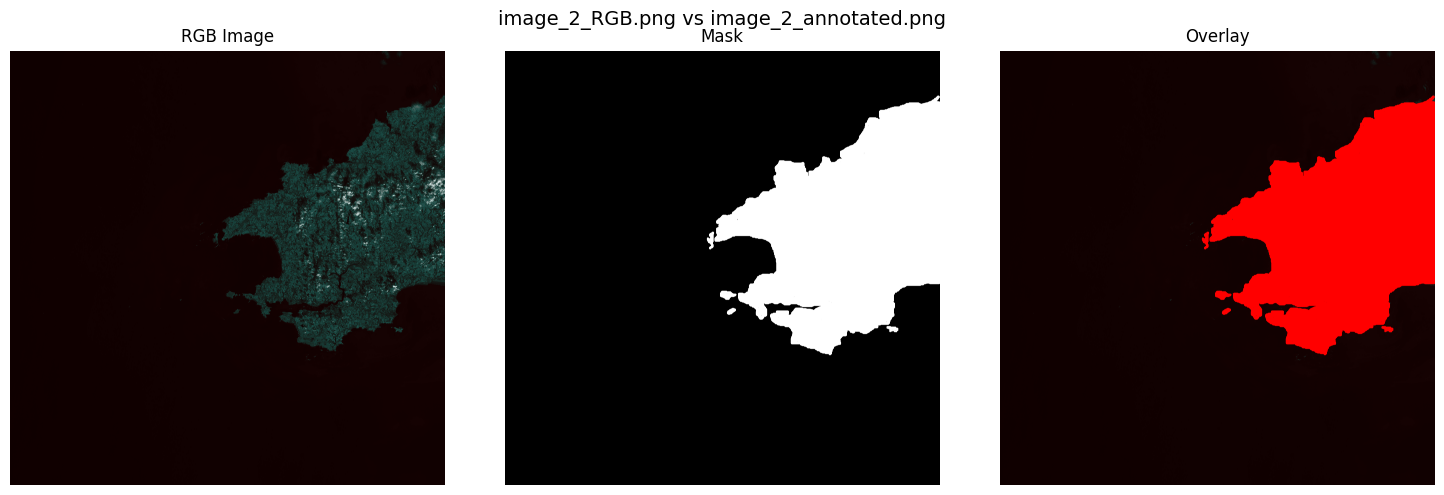

In [6]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import re

# === Define paths ===
rgbDir = r"C:\Users\wasif\Desktop\Annotated Images\images"
maskDir = r"C:\Users\wasif\Desktop\Annotated Images\masks"

# === Get all mask files and map by index ===
maskFiles = sorted([f for f in os.listdir(maskDir) if f.endswith(".png")])
maskMap = {}

# Extract index from mask filename
for fname in maskFiles:
    match = re.match(r"image_(\d+)_annotated\.png", fname.lower())
    if match:
        idx = int(match.group(1))
        maskMap[idx] = fname

# === Get all RGB files ===
rgbFiles = sorted([f for f in os.listdir(rgbDir) if f.endswith(".png")])

# === Match RGB with mask based on index and visualize ===
batchSize = 10
matched = []

for fname in rgbFiles:
    match = re.match(r"image_(\d+)_rgb\.png", fname.lower())
    if match:
        idx = int(match.group(1))
        if idx in maskMap:
            matched.append((fname, maskMap[idx]))

# === Visualize in batches ===
for i in range(0, len(matched), batchSize):
    batch = matched[i:i+batchSize]
    
    for rgbName, maskName in batch:
        rgbPath = os.path.join(rgbDir, rgbName)
        maskPath = os.path.join(maskDir, maskName)

        rgb = Image.open(rgbPath).convert("RGB")
        mask = Image.open(maskPath).convert("L")
        mask_np = np.array(mask)

        # === Plot side-by-side ===
        fig, axs = plt.subplots(1, 3, figsize=(15, 5))
        axs[0].imshow(rgb)
        axs[0].set_title("RGB Image")

        axs[1].imshow(mask, cmap="gray")
        axs[1].set_title("Mask")

        rgb_np = np.array(rgb)
        overlay = rgb_np.copy()
        overlay[mask_np > 127] = [255, 0, 0]
        axs[2].imshow(overlay)
        axs[2].set_title("Overlay")

        for ax in axs:
            ax.axis("off")

        plt.suptitle(f"{rgbName} vs {maskName}", fontsize=14)
        plt.tight_layout()
        plt.show()
